### About Dataset

## Question / Finding

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
data = pd.read_csv('C:/Users/User/Desktop/superMarket project/supermarket_sales - Sheet1.csv')

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# We can see that the date has object data type instead of datetime and we separate into day month and year

### change date into day, month and year

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [8]:
data= data.drop(['Date'] ,axis=1)

In [9]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [10]:
data.shape

(1000, 19)

### Statitisc information

In [11]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


### Check Missing value

In [12]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
dtype: int64

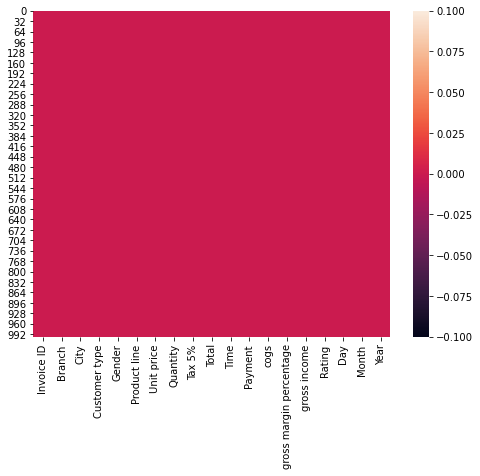

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())
plt.show()

In [14]:
# this data is clean there is no missing value in it

### Correlation between the variable

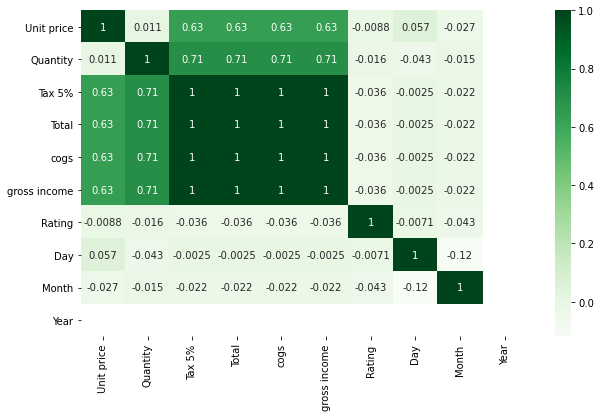

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(["gross margin percentage"], axis=1).corr(), annot=True , cmap='Greens')
plt.show()

In [16]:
# rating,day, month and year has not clear correlation with other variable  

### Unique column value

In [17]:
object_variable=data[['Payment','Branch','City','Customer type','Gender','Product line']]
for col in object_variable:
    print()
    if object_variable[col].dtype=='object':
        print(f'name of column is: {col} and unique values are: {object_variable[col].unique()}')
        print('-----'*20)


name of column is: Payment and unique values are: ['Ewallet' 'Cash' 'Credit card']
----------------------------------------------------------------------------------------------------

name of column is: Branch and unique values are: ['A' 'C' 'B']
----------------------------------------------------------------------------------------------------

name of column is: City and unique values are: ['Yangon' 'Naypyitaw' 'Mandalay']
----------------------------------------------------------------------------------------------------

name of column is: Customer type and unique values are: ['Member' 'Normal']
----------------------------------------------------------------------------------------------------

name of column is: Gender and unique values are: ['Female' 'Male']
----------------------------------------------------------------------------------------------------

name of column is: Product line and unique values are: ['Health and beauty' 'Electronic accessories' 'Home and lifestyl

In [18]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Day', 'Month', 'Year'],
      dtype='object')

### Q1 Which city has the greatest/Highest  gross income by City?


In [19]:
# Sort the dataset by 'Gross income' in descending order
income_sorted= data.sort_values('gross income' , ascending=False)
# Extract the city with the greatest gross income
city_sorted=  income_sorted['City'].iloc[0]
greatest_income=income_sorted['gross income'].iloc[0]

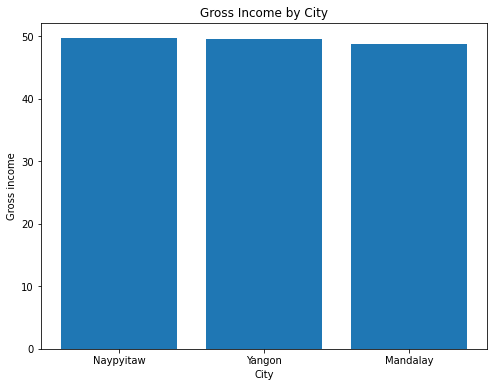

city with the Highest gross income Naypyitaw
Highest gross income 49.65


In [20]:
plt.figure(figsize=(8, 6))
plt.bar(income_sorted['City'] , income_sorted['gross income'])
    
plt.xlabel('City')
plt.ylabel('Gross income')
plt.title('Gross Income by City')

plt.show()

print('city with the Highest gross income' ,city_sorted )
print('Highest gross income' ,greatest_income )

### Q2  What is overall  gross income by City and Branch?


In [21]:
overall_income=data.groupby('Branch')['City'].sum()

print("Overall Gross Income by City:")
print(overall_income)

Overall Gross Income by City:
Branch
A    YangonYangonYangonYangonYangonYangonYangonYang...
B    MandalayMandalayMandalayMandalayMandalayMandal...
C    NaypyitawNaypyitawNaypyitawNaypyitawNaypyitawN...
Name: City, dtype: object


In [22]:
overall_income=data.groupby(['City' , "Branch"])['gross income'].sum()

print("Overall Gross Income by City:")
print(overall_income)

Overall Gross Income by City:
City       Branch
Mandalay   B         5057.0320
Naypyitaw  C         5265.1765
Yangon     A         5057.1605
Name: gross income, dtype: float64


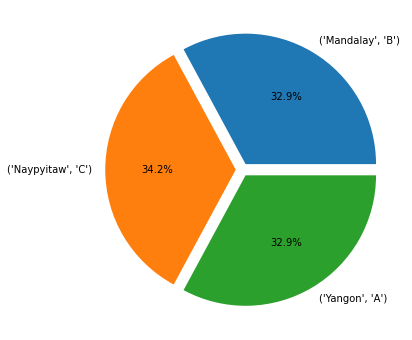

In [23]:
explode = [0.05] * len(overall_income) 
plt.figure(figsize=(8,6))
plt.pie(overall_income.values,labels=overall_income.index, autopct='%1.1f%%',explode=explode)
plt.show()

### Q3   What is  total sales in 3 Months?


In [24]:
overall_sales=data.groupby('Month')['Total'].sum()
print('over all sales in 3 months :', overall_sales)

over all sales in 3 months : Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


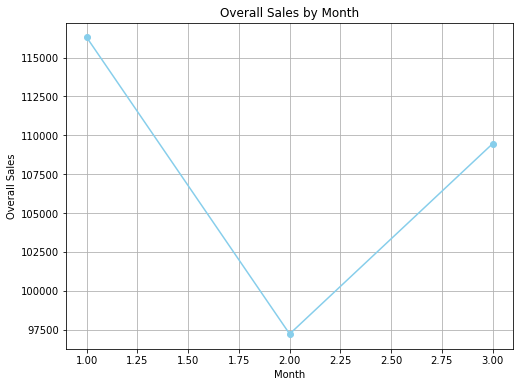

In [25]:
plt.figure(figsize=(8,6))
plt.plot(overall_sales, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall Sales by Month')
plt.grid(True)
plt.show()

### Q4   What is  total sales in Days?


over sales in days is :322966.749


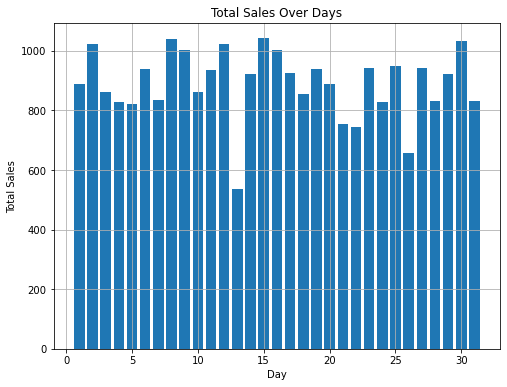

In [26]:
overall_sales = data['Total'].sum()
print(f'over sales in days is :{overall_sales}')

plt.figure(figsize=(8,6))
plt.bar(data['Day'] ,data['Total'])
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Days')
plt.grid(True)

plt.show()

### Q5 Which product category receives the highest average rating?


In [27]:
product_rating= data.groupby('Product line')['Rating'].mean()
print('',product_rating)

 Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


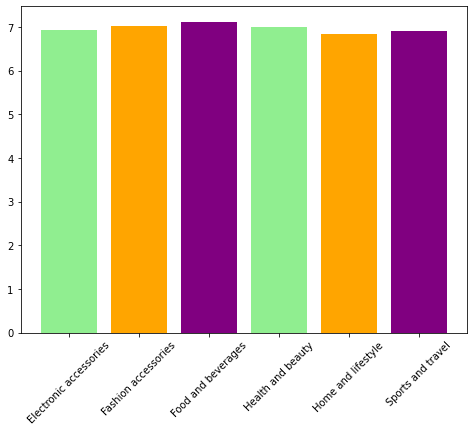

In [28]:
plt.figure(figsize=(8,6))
plt.bar(product_rating.index, product_rating.values, color=[ 'lightgreen', 'orange', 'purple'])
plt.xticks(rotation=45)
plt.show()

### Q6 How are different client types distributed?


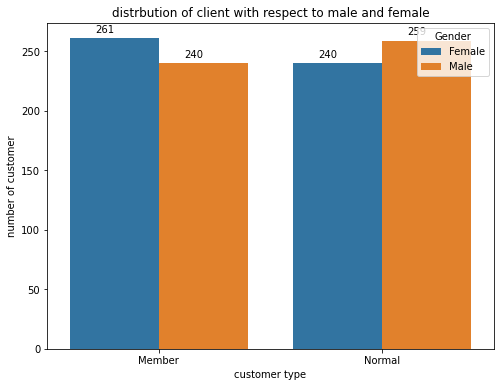

In [29]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Customer type', data=data, hue='Gender')

# Add value labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5,
            f'{height}', ha='right')
plt.xlabel('customer type')
plt.ylabel('number of customer')
plt.title('distrbution of client with respect to male and female')
plt.show()

### Q8 Which kind of payment is most preferred by customers?


In [30]:
payment_method= data.groupby(['Payment' ,'Gender'])['Total'].sum()
print('payment method use by customer')
print(payment_method)

payment method use by customer
Payment      Gender
Cash         Female    59514.210
             Male      52692.360
Credit card  Female    53498.445
             Male      47268.627
Ewallet      Female    54870.270
             Male      55122.837
Name: Total, dtype: float64


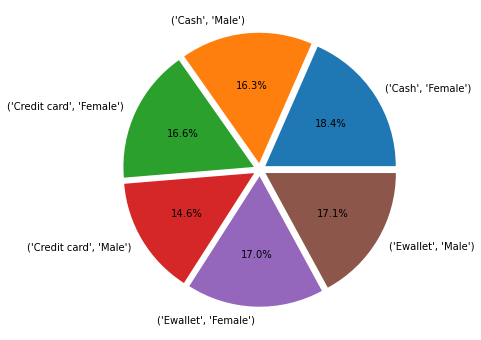

In [31]:
explode = [0.05] * len(payment_method) 
plt.figure(figsize=(8,6))
plt.pie(payment_method.values, labels=payment_method.index, autopct='%1.1f%%',explode=explode)
plt.show()

### Q7 What is the payment distribution of total sales with gender?


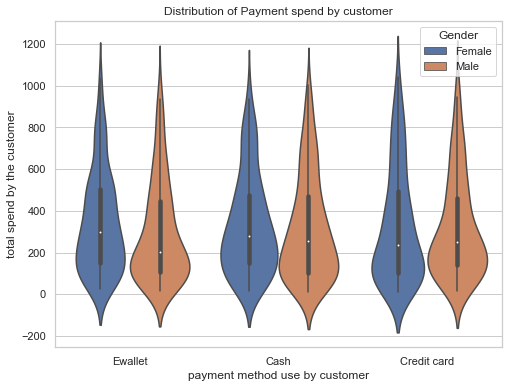

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.violinplot(x="Payment" , y='Total' , hue='Gender' , data=data )
plt.xlabel('payment method use by customer')
plt.ylabel('total spend by the customer')
plt.title('Distribution of Payment spend by customer')
plt.show()


### Q9 	Which product line has most sales ?



In [33]:
most_product_sale= data['Product line'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

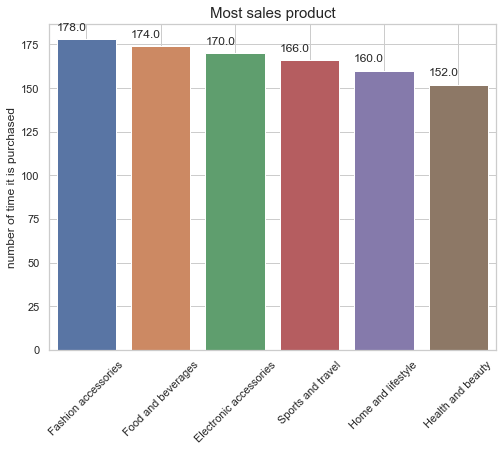

In [34]:
plt.figure(figsize=(8,6))
ax=sns.barplot(y= most_product_sale.values, x=most_product_sale.index )
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel('number of time it is purchased')
plt.title('Most sales product', size=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5,
            f'{height}', ha='right')
plt.show


### Q10 Who purchase things by category

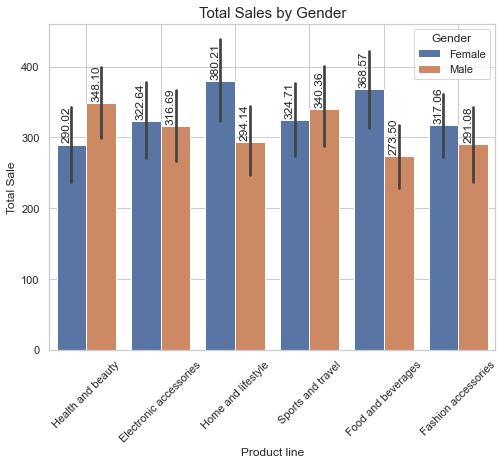

In [35]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x= data['Product line'], y=data['Total'] , hue='Gender' ,data=data)
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel('Total Sale')
plt.title('Total Sales by Gender', size=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5,
            f'{height:.2f}', ha='right', rotation=90)
plt.show()

### Target variable

In [36]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Day', 'Month', 'Year'],
      dtype='object')

In [37]:
ml_data= data[['Unit price', 'Quantity','gross income']]
ml_data.head()

,Unit price,Quantity,gross income
0,74.69,7,26.1415
1,15.28,5,3.8200
2,46.33,7,16.2155
3,58.22,8,23.2880
4,86.31,7,30.2085


In [38]:
ml_data

,Unit price,Quantity,gross income
0,74.69,7,26.1415
1,15.28,5,3.8200
2,46.33,7,16.2155
3,58.22,8,23.2880
4,86.31,7,30.2085
...,...,...,...
995,40.35,1,2.0175
996,97.38,10,48.6900
997,31.84,1,1.5920
998,65.82,1,3.2910


### Split data set

In [39]:
x=ml_data.drop('gross income', axis=1)
y=ml_data[['gross income']]

In [40]:
x.head()

,Unit price,Quantity
0,74.69,7
1,15.28,5
2,46.33,7
3,58.22,8
4,86.31,7


In [41]:
y.head()

,gross income
0,26.1415
1,3.8200
2,16.2155
3,23.2880
4,30.2085


### Test and Train model

In [42]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.3 , random_state=0)

In [43]:
print('size of x_train' , x_train.shape)
print('size of x_test' , x_test.shape)
print('size of y_train' , y_train.shape)
print('size of y_test' , y_test.shape)

size of x_train (700, 2)
size of x_test (300, 2)
size of y_train (700, 1)
size of y_test (300, 1)


### Model Selction 

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model =LinearRegression().fit(x_train, y_train)

### Model evaluation

In [46]:
print('Score of test model ' ,model.score( x_test , y_test))
print('Score of train model ' ,model.score( x_train , y_train))

Score of test model  0.8998570786791609
Score of train model  0.8856682962640658


### Prediction

In [47]:
y_pred=model.predict([[74.6,7]])
print('this prediction is very close to first value ', y_pred)

this prediction is very close to first value  [[24.68906802]]


### Error

In [48]:
from sklearn import metrics
print('mean absolute error', metrics.mean_absolute_error(y_test , model.predict(x_test)) )
print('mean square error' ,metrics.mean_squared_error(y_test,model.predict(x_test)))
print('root mean square error' ,np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))
print('r square error',metrics.r2_score(y_test , model.predict(x_test)))
# adjestic r2
r2=metrics.r2_score(y_test , model.predict(x_test))
print('adjusted r2', 1-((1-r2)*(40-1)/(40-1-1)))

mean absolute error 2.839439669008149
mean square error 14.154313551775958
root mean square error 3.762221890289827
r square error 0.8998570786791609
adjusted r2 0.8972217386444019
